In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 2.3 로지스틱 회귀(Logistic Regression)

앞에서 선형회귀를 다루었습니다. 선형회귀란 x에 대해 y을 선형공간에 fitting하는 것입니다. 이때 fitting될 수 있는 공간이 continuous 한 값을 가집니다. 그리고 이것을 regression이라고 합니다.


로지스틱은 이와 다르게 classification을 해결합니다(이름에 속으면 안됩니다). 즉 분류를 하죠. 

예로들면 메일이 스팸이냐 스팸이 아닌가? 병에 걸렸는가 안걸렸는가? (binary classification)

또는 현재 사진에 찍힌 객체가 자동차인가? 기차인가? 배인가? (multinomial classification)

여기서 binary classification과 multinomial classification은 말그래도 두가지중 어떤것인가? N가지중 어떤것인가에 대한 분류문제에 대한 명칭입니다. 
 
 
여기서는  binary classification을 앞에서 다룬 선형회귀와 비교하며 설명하겠습니다. 먼저 데이터를 살펴보면 다음과 같습니다.


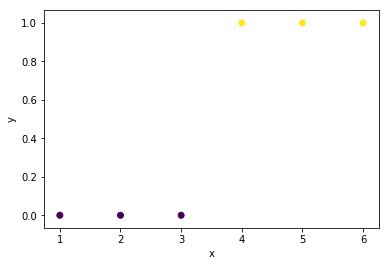

In [2]:
x_train = [1,2,3,4,5,6]
y_train = [0,0,0,1,1,1]

plt.scatter(x_train, y_train, c=y_train)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 2.3.1 모델

로지스틱회귀는  regression이 아닌 classification문제를 해결합니다. 즉 binary classification에서 0또는 1, 참 또는 거짓으로 판단합니다. 이를 위해 logit function에 해당하는 sigmoid를 사용합니다.

$$ h_\theta (x) = \theta_0 + \theta_1 x $$


$$
\begin{align}
sigmoid(x) & = \frac{1}{1+e^{-x}}  \\\\\
\end{align}
$$

sigmoid는 다음과 같은 함수 입니다.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)


기존의 선형회귀에 sigmoid를 적용해 봅시다.

$$
\begin{align}
sigmoid(h_\theta (x)) & = \frac{1}{1+e^{-h_\theta (x)}}  \\\\\
\end{align}
$$

그리고 이것은 다음과 같습니다.

$$
\begin{align}
sigmoid(\theta x) & = \frac{1}{1+e^{-\theta x}}  \\\\\
\end{align}
$$

이것이 로지스틱 회귀입니다! 선형회귀에 sigmoid를 적용한것입니다. 일반화 하면 다음과 같습니다.

$$
\begin{align}
h_\theta(x) & = \frac{1}{1+e^{-\theta x}}  \\\\\
\end{align}
$$


위의 함수의 형태를 보면 대략 -4정도가 되면 0, +4정도가 되면 1, 0.5일때 0을 출력합니다. 로지스틱 회귀에서는 0.5를 기준으로 작은가 큰가로 0인가 1인가를 판단합니다.  그리고 이것이 가능하게 만드는 것은 비용함수입니다!

In [3]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(x, theta, bias):
    return tf.div(1., 1. + tf.exp(-1 * tf.multiply(x, theta) + bias))
  

theta = tf.Variable(0.0)
bias = tf.Variable(0.0)
y_model = model(X, theta, bias)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


## 2.3.2 비용함수
로지스틱회귀가 선형회귀에서 로지스틱함수에 해당하는 sigmoid를 적용한것임을 배웠습니다. 그럼 비용함수는 어떻게 될까요 ?

입력(x,y)에 대해 다시 정의를 해봅시다. classification에 해당한는 로지스틱회귀에서 y는 0또는  1입니다(binary classification). 즉 y가 1일때 모델의 출력이 1이면 비용함수의 결과가 0이 되어야 합니다. 

입력이 1일때 출력이 0인 함수는 log 함수가 있습니다.

![](http://wiki.engageeducation.org.au/wp-content/uploads/2015/10/funclog1-300x300.jpg)


그렇습니다! 로지스틱회귀에서는 비용함수를 계산하기 위해 log 함수를 사용합니다! 

한단계더 정확하게 설명하면 -log를 사용합니다. 이유는 위 그래프에서와 같이  로지스틱회귀는 y가 0또는 1입니다.

즉 y가 1인데 모델은 0을 출력할 시 비용함수의 결과가  커지는 것을 처리하기 때문입니다.

$$
\begin{align}
- log(h(x))
\end{align}
$$


그럼 y가 0일때 모델의 출력이 0일때 비용이 0이 되게할려면? 다음과 같습니다. 

$$
\begin{align}
- log(1−h(x))
\end{align}
$$

모델인 h(x)가 0이면 log의 출력으로 0을 반환하겠죠?

또한 위 비용함수는 각각 y가 1일때, 0일때만 처리되어야 합니다. 이것을 위해 y가 1일때는 y를 곱하고 y가 0일때는 1-y를 곱해 활성화를 시킵니다.

이때까지의 설명을 일반화 해봅시다.

$$
\begin{align}
cost(h(x),y) & = −y log(h(x))−(1−y)log(1−h(x))
\end{align}
$$





In [0]:
cost =  -Y * tf.log(y_model) - (1 - Y) * tf.log(1 - y_model)

## 2.3.3 학습하기
로지스틱회귀도 선형회귀와 같이 경사하강법을 사용하여 학습을 합니다. 즉 우리가 원하는 동작을하는 모델, 즉 theta를 찾는 것이죠. 결과는 같습니다. 

$$ \theta :=\theta - \alpha\frac{ \partial } {\partial \theta } cost(\theta) $$

$$ \theta :=\theta - \alpha ( h_\theta (x) - y ) x $$


In [5]:
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

with tf.Session() as sess:
    tf.global_variables_initializer().run()

    for i in range(1000):
        for (x, y) in zip(x_train, y_train):
            sess.run(train_op, feed_dict={X: x, Y: y})

    learning_result_theta = sess.run(theta)
    learning_result_bias = sess.run(bias)
    
    print(learning_result_theta, learning_result_bias)

1.3697914 4.440873


In [8]:
with tf.Session() as sess:
  print("result %f " % sess.run(tf.math.greater(model(4., learning_result_theta, learning_result_bias), 0.5)) )

result 1.000000 
